<a href="https://colab.research.google.com/github/swetaiese07/Number-one-repo/blob/main/CNN_Potato_Leaf_Disease_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#DEEP LEARNING ASSIGNMENT 2
#INSTALLING NECESSARY LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import matplotlib.image as mpimg
import random
from sklearn import preprocessing
import tensorflow.keras as keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [23]:
#ADDING SOME STATIC VARIABLES
SIZE = 256
SEED_TRAINING = 121
SEED_TESTING = 197
SEED_VALIDATION = 164
CHANNELS = 3
n_classes = 3
EPOCHS = 50
BATCH_SIZE = 16
input_shape = (SIZE, SIZE, CHANNELS)

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:
#ACCESSING DATASET FROM DRIVE
dataset = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/kaggle_dataset/potato-leaf-disease-dataset/Potato/Train',
                                                      batch_size=32,
                                                      image_size=(256, 256),
                                                      shuffle=True)

Found 900 files belonging to 3 classes.


In [26]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch)
  print(image_batch[0])


(32, 256, 256, 3)
tf.Tensor([2 2 2 2 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 2 0 1 1 0 2 1 0], shape=(32,), dtype=int32)
tf.Tensor(
[[[190. 174. 185.]
  [190. 174. 185.]
  [191. 175. 186.]
  ...
  [177. 161. 171.]
  [175. 159. 169.]
  [171. 155. 165.]]

 [[187. 171. 182.]
  [187. 171. 182.]
  [187. 171. 182.]
  ...
  [177. 161. 171.]
  [174. 158. 168.]
  [171. 155. 165.]]

 [[187. 171. 182.]
  [187. 171. 182.]
  [187. 171. 182.]
  ...
  [177. 161. 171.]
  [174. 158. 168.]
  [171. 155. 165.]]

 ...

 [[170. 154. 164.]
  [170. 154. 164.]
  [170. 154. 164.]
  ...
  [143. 122. 129.]
  [140. 119. 126.]
  [131. 110. 117.]]

 [[170. 154. 164.]
  [170. 154. 164.]
  [170. 154. 164.]
  ...
  [141. 120. 127.]
  [137. 116. 123.]
  [143. 122. 129.]]

 [[170. 154. 164.]
  [170. 154. 164.]
  [170. 154. 164.]
  ...
  [135. 114. 121.]
  [133. 112. 119.]
  [151. 130. 137.]]], shape=(256, 256, 3), dtype=float32)


In [27]:
class_names = dataset.class_names

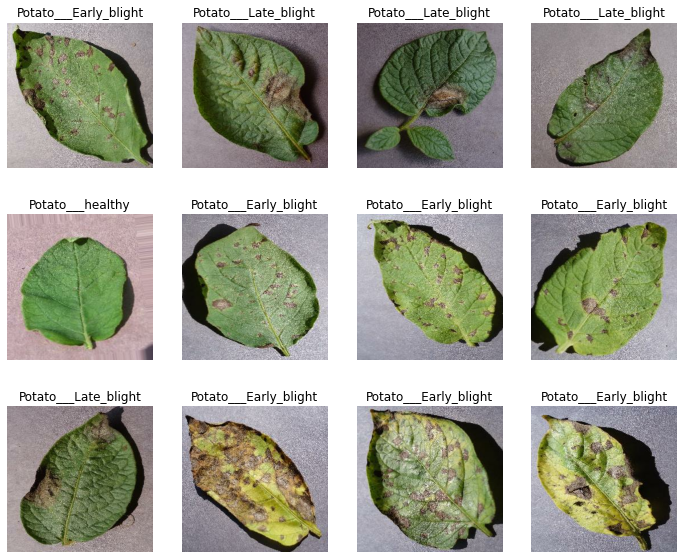

In [28]:
plt.figure(figsize=(12,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.title(class_names[label_batch[i]])
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.axis(False)

In [29]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 30,
        shear_range = 0.2,
        zoom_range = 0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip = True,
        fill_mode = 'nearest')

In [30]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [31]:
#DEFINING THE TRAIN DATASET
train_generator = train_datagen.flow_from_directory(
        directory = '/content/gdrive/MyDrive/kaggle_dataset/potato-leaf-disease-dataset/Potato/Train',  # this is the input directory
        target_size = (256, 256),  # all images will be resized to 64x64
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode="rgb")

Found 900 images belonging to 3 classes.


In [32]:
#DEFINING THE VALIDATION DATASET
validation_generator = validation_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/kaggle_dataset/potato-leaf-disease-dataset/Potato/Valid/',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode='categorical',
        color_mode="rgb")

Found 300 images belonging to 3 classes.


In [33]:
#DEFINING THE TEST DATASET
test_generator = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/kaggle_dataset/potato-leaf-disease-dataset/Potato/Test/',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode = "rgb")

Found 300 images belonging to 3 classes.


In [34]:
#BUILDING THE CNN MODEL
model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation ='relu'),
        keras.layers.Dense(n_classes, activation='softmax')
    ])

In [35]:
#MODEL SUMMARY
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 64)       

In [36]:
#COMPILING THE MODEL
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics  = ['accuracy']
    )

In [37]:
#TRAINING THE MODEL
history = model.fit_generator(
        train_generator,
        steps_per_epoch = train_generator.n // train_generator.batch_size,    #The 2 slashes division return rounded integer
        epochs = EPOCHS,
        validation_data = validation_generator,
        validation_steps = validation_generator.n // validation_generator.batch_size
        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/2
56/56 [==============================] - 116s 2s/step - loss: 1.1026 - accuracy: 0.3167 - val_loss: 1.0983 - val_accuracy: 0.3299
Epoch 2/2
56/56 [==============================] - 114s 2s/step - loss: 1.0765 - accuracy: 0.3529 - val_loss: 1.0316 - val_accuracy: 0.5417


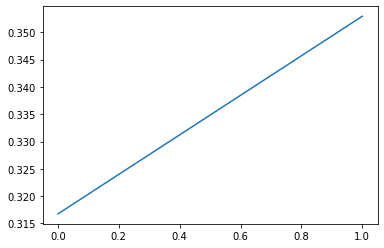

In [38]:
plt.plot(history.history['accuracy'])